In [2]:
import tifffile
import matplotlib.pyplot as plt

fullres_image_filepath = "G:\Alexis_data\Project\SpatialOmics_cellpose\data\output-XETG00245__0034182__1835od__20240613__195055\morphology_focus\morphology_focus_0000.ome.tif"

# Load the image
fullres_multich_img = tifffile.imread(fullres_image_filepath, is_ome=True, level=0, aszarr=False)

<tifffile.TiffFile 'morphology_focus_0000.ome.tif'> OME series cannot read multi-file pyramids


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box

def GET_roi_polygon(csv_filepath: str, title: str = "Polygon ROI"):
    """
    Reads ROI coordinates from a CSV file and plots the polygon.

    Parameters:
    - csv_filepath (str): Path to the CSV file containing ROI coordinates.
    - title (str): Title of the plot (default: "Polygon ROI").
    """

    # Read the ROI coordinates from the CSV file
    polygon_coords = pd.read_csv(csv_filepath)

    # Extract the X and Y coordinates
    x_coords = polygon_coords['X']
    y_coords = polygon_coords['Y']


    # Create a plot
    plt.figure(figsize=(6, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Polygon ROI', markersize=2)

    # Close the polygon by connecting the last point to the first
    plt.plot([x_coords.iloc[0], x_coords.iloc[-1]], [y_coords.iloc[0], y_coords.iloc[-1]], 'b-')

    # Adding labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    x_coords = polygon_coords['X'].to_list()
    y_coords = polygon_coords['Y'].to_list()

    # Combine X and Y into coordinate pairs
    coordinate_pairs = list(zip(x_coords, y_coords))

    # Create a Polygon object
    polygon_roi = Polygon(coordinate_pairs)

    return polygon_roi

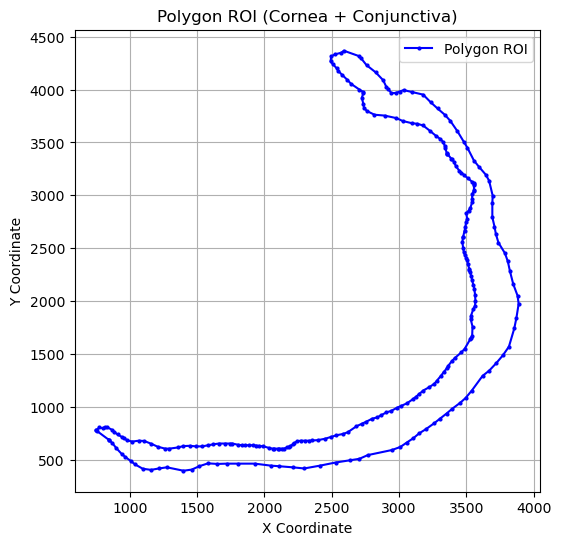

In [16]:
# Example usage
ROI_filepath = "G:/Alexis_data/Project/SpatialOmics_cellpose/data/output-XETG00245__0034182__1835od__20240613__195055/1835od_corneasection.csv"
ROI_POLYGON = GET_roi_polygon(ROI_filepath, "Polygon ROI (Cornea + Conjunctiva)")


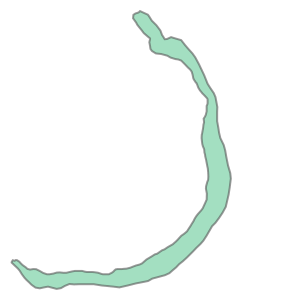

In [17]:
ROI_POLYGON

In [37]:

def crop_polygon_to_overlapping_squares(polygon, square_size, overlap_size=40):
    """
    Crops a polygon into overlapping square regions of a given size.

    Args:
        polygon (Polygon): The input polygon to crop.
        square_size (float): The base size of each square region (side length).
        overlap_size (float): The amount of overlap in um (default: 20).

    Returns:
        List[Polygon]: List of overlapping square polygons that fully contain the polygon.
    """
    # Get bounding box of the polygon
    minx, miny, maxx, maxy = polygon.bounds

    # Generate grid of overlapping squares
    squares = []
    for x in range(int(minx), int(maxx), square_size):
        for y in range(int(miny), int(maxy), square_size):
            # Create expanded square with overlap
            # First vertex (x, y) remains the same
            # Other vertices are expanded by overlap_size
            square = box(
                x,                          # minx (unchanged)
                y,                          # miny (unchanged)
                x + square_size + overlap_size,  # maxx (expanded)
                y + square_size + overlap_size   # maxy (expanded)
            )
            # Check if the square intersects the polygon
            if polygon.intersects(square):
                squares.append(square)
    
    return squares

square: POLYGON ((1187 395, 1187 835, 747 835, 747 395, 1187 395))
 x: array('d', [1187.0, 1187.0, 747.0, 747.0, 1187.0]) 
 y: array('d', [395.0, 835.0, 835.0, 395.0, 395.0])
square: POLYGON ((1187 795, 1187 1235, 747 1235, 747 795, 1187 795))
 x: array('d', [1187.0, 1187.0, 747.0, 747.0, 1187.0]) 
 y: array('d', [795.0, 1235.0, 1235.0, 795.0, 795.0])
square: POLYGON ((1587 395, 1587 835, 1147 835, 1147 395, 1587 395))
 x: array('d', [1587.0, 1587.0, 1147.0, 1147.0, 1587.0]) 
 y: array('d', [395.0, 835.0, 835.0, 395.0, 395.0])
square: POLYGON ((1987 395, 1987 835, 1547 835, 1547 395, 1987 395))
 x: array('d', [1987.0, 1987.0, 1547.0, 1547.0, 1987.0]) 
 y: array('d', [395.0, 835.0, 835.0, 395.0, 395.0])
square: POLYGON ((2387 395, 2387 835, 1947 835, 1947 395, 2387 395))
 x: array('d', [2387.0, 2387.0, 1947.0, 1947.0, 2387.0]) 
 y: array('d', [395.0, 835.0, 835.0, 395.0, 395.0])
square: POLYGON ((2787 395, 2787 835, 2347 835, 2347 395, 2787 395))
 x: array('d', [2787.0, 2787.0, 2347.0, 

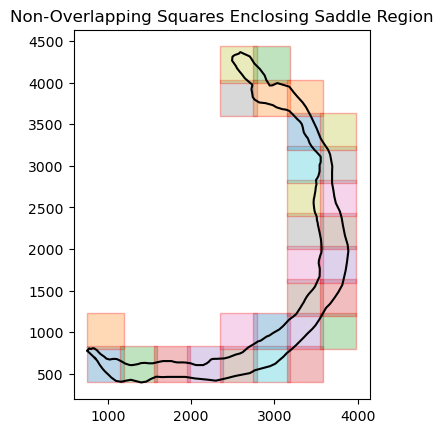

In [ ]:
# Define square size
square_size = 400 # Adjust as necessary 

# Generate non-overlapping square regions
overlapping_squares = crop_polygon_to_overlapping_squares(ROI_POLYGON, square_size)

# Visualization
fig, ax = plt.subplots()
# Plot the original polygon
x, y = ROI_POLYGON.exterior.xy
ax.plot(x, y, 'k-', label="Saddle-shaped Polygon")  # Black for polygon

# Plot the square regions
for square in overlapping_squares:
    print("square:", square)
    x, y = square.exterior.xy
    print(" x:", x,"\n", "y:", y)
    ax.fill(x, y, edgecolor='red', alpha=0.3, label="Red Square")

# Add labels and legend
ax.set_title(f"Non-Overlapping Squares Enclosing Saddle Region")
ax.set_aspect('equal', 'box')
# ax.legend(loc="upper left")
plt.show()

In [39]:
overlapping_squares

[<POLYGON ((1187 395, 1187 835, 747 835, 747 395, 1187 395))>,
 <POLYGON ((1187 795, 1187 1235, 747 1235, 747 795, 1187 795))>,
 <POLYGON ((1587 395, 1587 835, 1147 835, 1147 395, 1587 395))>,
 <POLYGON ((1987 395, 1987 835, 1547 835, 1547 395, 1987 395))>,
 <POLYGON ((2387 395, 2387 835, 1947 835, 1947 395, 2387 395))>,
 <POLYGON ((2787 395, 2787 835, 2347 835, 2347 395, 2787 395))>,
 <POLYGON ((2787 795, 2787 1235, 2347 1235, 2347 795, 2787 795))>,
 <POLYGON ((2787 3595, 2787 4035, 2347 4035, 2347 3595, 2787 3595))>,
 <POLYGON ((2787 3995, 2787 4435, 2347 4435, 2347 3995, 2787 3995))>,
 <POLYGON ((3187 395, 3187 835, 2747 835, 2747 395, 3187 395))>,
 <POLYGON ((3187 795, 3187 1235, 2747 1235, 2747 795, 3187 795))>,
 <POLYGON ((3187 3595, 3187 4035, 2747 4035, 2747 3595, 3187 3595))>,
 <POLYGON ((3187 3995, 3187 4435, 2747 4435, 2747 3995, 3187 3995))>,
 <POLYGON ((3587 395, 3587 835, 3147 835, 3147 395, 3587 395))>,
 <POLYGON ((3587 795, 3587 1235, 3147 1235, 3147 795, 3587 795))>,
 

In [44]:
ddir = 'G:\Alexis_data\Project\SpatialOmics_cellpose\results'
fullres_chanel_0 = "G:\Alexis_data\Project\SpatialOmics_cellpose\data\output-XETG00245__0034182__1835od__20240613__195055\morphology_focus\morphology_focus_0000.ome.tif"
fullres_chanel_2 = "G:\Alexis_data\Project\SpatialOmics_cellpose\data\output-XETG00245__0034182__1835od__20240613__195055\morphology_focus\morphology_focus_0002.ome.tif"

# Output directory
odir = f'{ddir}cellpose/'
gjurl = f'{odir}a.geojson'

# Levels: pixelsize in µm https://kb.10xgenomics.com/hc/en-us/articles/11636252598925
scalefactors = {
    0: 0.2125,
    1: 0.4250,
    2: 0.85,
    3: 1.7,
    4: 3.4,
    5: 6.8,
    6: 13.6,
    7: 27.2,
}


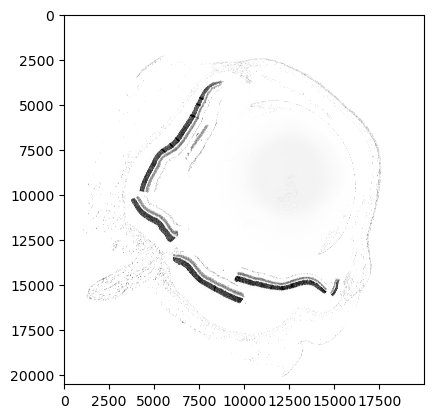

In [45]:
level = 0
pixelsize = scalefactors[level]
image_chanel_0 = tifffile.imread(fullres_chanel_0, is_ome=False, level=level)
plt.imshow(image_chanel_0, cmap='binary')
plt.axis('scaled')
plt.show()

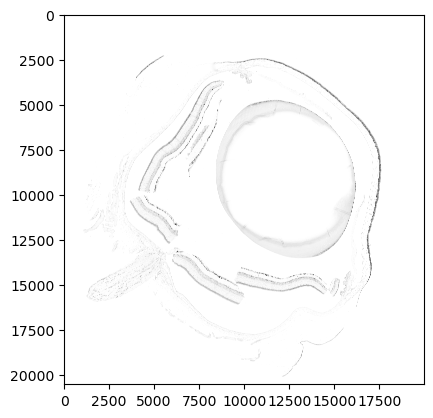

In [46]:
image_chanel_2 = tifffile.imread(fullres_chanel_2, is_ome=False, level=level)
plt.imshow(image_chanel_2, cmap='binary')
plt.axis('scaled')
plt.show()

In [47]:
import cellpose
import geopandas as gpd
import numpy as np
import pandas as pd
import scipy
import shapely
import skimage as ski
import tifffile
import zarr

from cellpose import core, utils, io, models, metrics, plot
from collections import Counter
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from tqdm import tqdm

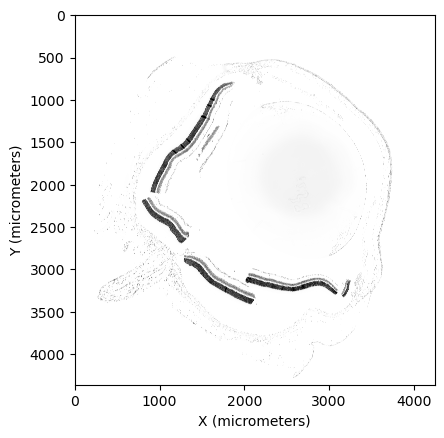

In [48]:
# Create the coordinate system in micrometers
x_coords = np.arange(image_chanel_0.shape[1]) * pixelsize  # X-axis in micrometers
y_coords = np.arange(image_chanel_0.shape[0]) * pixelsize  # Y-axis in micrometers

# Plot the image with micrometer-scaled axes
plt.imshow(image_chanel_0, cmap='binary', extent=[x_coords[0], x_coords[-1], y_coords[-1], y_coords[0]])
plt.xlabel('X (micrometers)')
plt.ylabel('Y (micrometers)')
plt.axis('scaled')
plt.show()

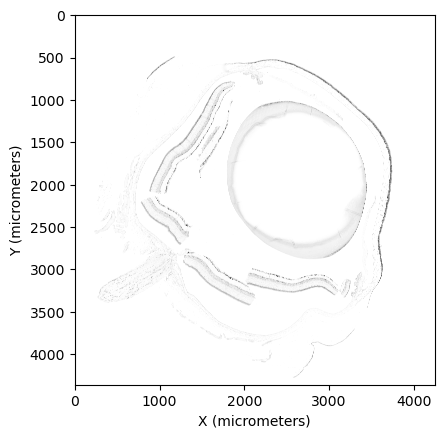

In [49]:
# Create the coordinate system in micrometers
x_coords = np.arange(image_chanel_2.shape[1]) * pixelsize  # X-axis in micrometers
y_coords = np.arange(image_chanel_2.shape[0]) * pixelsize  # Y-axis in micrometers

# Plot the image with micrometer-scaled axes
plt.imshow(image_chanel_2, cmap='binary', extent=[x_coords[0], x_coords[-1], y_coords[-1], y_coords[0]])
plt.xlabel('X (micrometers)')
plt.ylabel('Y (micrometers)')
plt.axis('scaled')
plt.show()

In [50]:
def array_summary(arr):
    """
    Prints summary statistics for a NumPy array.

    Parameters:
    arr (np.ndarray): The NumPy array to analyze.

    Returns:
    dict: A dictionary of summary statistics.
    """
    stats = {
        "Min": arr.min(),
        "Max": arr.max(),
        "Mean": arr.mean(),
        "Median": np.median(arr),
        "Standard Deviation": arr.std(),
        "Shape": arr.shape
    }

    print("Summary Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value}")
    
    return stats

In [ ]:
# Get summary statistics
summary = array_summary(image_chanel_2)


Summary Statistics:
Min: 0
Max: 11041
Mean: 120.77539539884582
Median: 3.0
Standard Deviation: 487.44346510744697
Shape: (20519, 19977)


{'Min': 0,
 'Max': 11041,
 'Mean': 120.77539539884582,
 'Median': 3.0,
 'Standard Deviation': 487.44346510744697,
 'Shape': (20519, 19977)}

In [ ]:
from skimage.draw import polygon

# Rescale the coordinates
scaling_factor = pixelsize
x_coords_rescaled = x_coords / scaling_factor
y_coords_rescaled = y_coords / scaling_factor




In [ ]:
# Generate a mask using the rescaled polygon coordinates
mask_shape = (int(image_chanel_2.shape[0]), int(image_chanel_2.shape[1]))  # Ensure mask matches image shape
mask = np.zeros(mask_shape, dtype=bool)

# Generate polygon mask coordinates with rescaled values
rr, cc = polygon(y_coords_rescaled, x_coords_rescaled, mask.shape)
mask[rr, cc] = True

In [ ]:
# Visualize the cropped image
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.title('Cropped Image')
plt.axis('on')
plt.show()

In [ ]:
# Apply the mask to crop the image
cropped_image0 = np.where(mask, image_chanel_0, 0)  # Keep masked region, set others to 0

# Visualize the cropped image
import matplotlib.pyplot as plt
plt.imshow(cropped_image0, cmap='gray')
plt.title('Cropped Image')
plt.axis('on')
plt.show()

In [ ]:
# Apply the mask to crop the image
cropped_image2 = np.where(mask, image_chanel_2, 0)  # Keep masked region, set others to 0

# Visualize the cropped image
import matplotlib.pyplot as plt
plt.imshow(cropped_image0, cmap='gray')
plt.title('Cropped Image')
plt.axis('on')
plt.show()

In [ ]:
# Combine X and Y into coordinate pairs
rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))

# Create a Polygon object
rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
print(rescaled_polygon_roi)

In [ ]:
# Define square size
square_size = 400/0.2125 # Adjust as necessary 

# Generate non-overlapping square regions
overlapping_squares = crop_polygon_to_overlapping_squares(ROI_POLYGON, square_size)

# Visualization
fig, ax = plt.subplots()
# Plot the original polygon
x, y = ROI_POLYGON.exterior.xy
ax.plot(x, y, 'k-', label="Saddle-shaped Polygon")  # Black for polygon

# Plot the square regions
for square in overlapping_squares:
    print("square:", square)
    x, y = square.exterior.xy
    print(" x:", x,"\n", "y:", y)
    ax.fill(x, y, edgecolor='red', alpha=0.3, label="Red Square")

# Add labels and legend
ax.set_title(f"Non-Overlapping Squares Enclosing Saddle Region")
ax.set_aspect('equal', 'box')
# ax.legend(loc="upper left")
plt.show()

In [ ]:
# Define a function to crop the image based on a shapely Polygon
def crop_region(image, poly):
    """
    Crops the rectangular bounding box of a polygon from an image.

    Parameters:
        image (ndarray): The original image to crop.
        poly (Polygon): A shapely Polygon object defining the region.

    Returns:
        ndarray: The cropped image region.
    """
    # Get the bounding box of the polygon
    min_x, min_y, max_x, max_y = map(int, poly.bounds)
    
    # Crop the image using the bounding box
    cropped_image = image[min_y:max_y, min_x:max_x]
    
    return cropped_image


# Process and plot the square regions
for i, square in enumerate(overlapping_squares):
    print(f"Processing square {i + 1}:", square)
    
    # ch 0 Crop the region 
    cropped_image_sub = crop_region(cropped_image0, square)

    # ch2 Crop the region
    cropped_image_sub2 = crop_region(cropped_image2, square)

    cropped_image_sub_combined = np.stack((cropped_image_sub, cropped_image_sub2), axis=0)


    # Save the cropped image
    save_path = f"results/cropped_image/cropped_square_com_{i + 1}.tif"
    tifffile.imwrite(save_path, cropped_image_sub_combined)
    print(f"Cropped image saved to {save_path}")
    